# Handwritten Digit Recognition 

Training a neural network to recognize hand-written digits from 0-9. 

## Outline 
1. Packages 


### 1. Packages 

- [numpy](https://numpy.org/) 
- [matplotlib](http://matplotlib.org) 
- [tensorflow](https://www.tensorflow.org/) 

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'; dldarkblue =  '#0D5BDC'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
#%matplotlib widget
#import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

#from public_tests import * 

#from autils import *
#from lab_utils_softmax import plt_softmax
#np.set_printoptions(precision=2)

### 2. Load and Check Dataset

In [2]:
# Load dataset 
X = np.load("data/X.npy")
y = np.load("data/y.npy")

In [3]:
# Check that the dataset loaded properly 
print(f'The first element of X is: {X[0]}')
print(f'The first element of y is: {y[0,0]}, the last element of y is {y[-1,0]}')
print(f'The shape of X is: {str(X.shape)}, the shape of y is {str(y.shape)}')

The first element of X is: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [4]:
# Split dataset into training, cross validation and test sets 
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.3)
X_crossval, X_test, y_crossval, y_test = train_test_split(X_, y_, test_size = 0.5)

print(f'The shape of X_train is {str(X_train.shape)}. The shape of y_train is {str(y_train.shape)}')
print(f'The shape of X_crossval is {str(X_crossval.shape)}. The shape of y_crossval is {str(y_crossval.shape)}')
print(f'The shape of X_test is {str(X_test.shape)}. The shape of y_test is {str(y_test.shape)}')
#print(f'The first element of y is: {y[0,0]}, the last element of y is {y[-1,0]}')
#print(f'The shape of X is: {str(X.shape)}, the shape of y is {str(y.shape)}')

The shape of X_train is (3500, 400). The shape of y_train is (3500, 1)
The shape of X_crossval is (750, 400). The shape of y_crossval is (750, 1)
The shape of X_test is (750, 400). The shape of y_test is (750, 1)


### 3. Define Model

In [38]:
model = Sequential (
    [
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(120, activation='relu', name='L1', kernel_regularizer=tf.keras.regularizers.l2(0.00)),
        tf.keras.layers.Dense(25, activation='relu', name='L2', kernel_regularizer=tf.keras.regularizers.l2(0.00)),
        tf.keras.layers.Dense(15, activation='relu', name='L3', kernel_regularizer=tf.keras.regularizers.l2(0.00)),
        tf.keras.layers.Dense(10, activation='linear', name='L4', kernel_regularizer=tf.keras.regularizers.l2(0.00))
    ], name = '4_Layer_model'
)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [6]:
model.summary()

Model: "4_Layer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               48120     
                                                                 
 L2 (Dense)                  (None, 25)                3025      
                                                                 
 L3 (Dense)                  (None, 15)                390       
                                                                 
 L4 (Dense)                  (None, 10)                160       
                                                                 
Total params: 51695 (201.93 KB)
Trainable params: 51695 (201.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Identify the shapes of the layer parameters

[layer1, layer2, layer3, layer4] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4, b4 = layer4.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W4 shape = {W4.shape}, b4 shape = {b4.shape}")

W1 shape = (400, 120), b1 shape = (120,)
W2 shape = (120, 25), b2 shape = (25,)
W3 shape = (25, 15), b3 shape = (15,)
W4 shape = (15, 10), b4 shape = (10,)


### 4. Train the Model

In [39]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X_train, y_train,
    epochs=40
)

Epoch 1/40
110/110 [==============================] - 1s 1ms/step - loss: 1.4264
Epoch 2/40
110/110 [==============================] - 0s 1ms/step - loss: 0.5665
Epoch 3/40
110/110 [==============================] - 0s 1ms/step - loss: 0.3761
Epoch 4/40
110/110 [==============================] - 0s 1ms/step - loss: 0.2939
Epoch 5/40
110/110 [==============================] - 0s 1ms/step - loss: 0.2246
Epoch 6/40
110/110 [==============================] - 0s 1ms/step - loss: 0.1875
Epoch 7/40
110/110 [==============================] - 0s 1ms/step - loss: 0.1605
Epoch 8/40
110/110 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 9/40
110/110 [==============================] - 0s 1ms/step - loss: 0.1040
Epoch 10/40
110/110 [==============================] - 0s 1ms/step - loss: 0.0913
Epoch 11/40
110/110 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 12/40
110/110 [==============================] - 0s 1ms/step - loss: 0.0700
Epoch 13/40
110/110 [====

### 5. Check Bias and Variance

In [27]:
# Define diagnostic functions

def eval_mse(y, yhat):
    m = len(y) 
    err = 0.0 
    for i in range(m):
        err += (y[i] - yhat[i])**2
    err /= 2*m
    return err

def eval_cat_err(y, yhat):
    m = len(y)
    err = 0
    for i in range(m):
        if yhat[i]!= y[i]:
            err += 1
    err = err/m
    return err

def get_predictions(model, training_set):
    pred_probs = model.predict(training_set)
    preds = np.zeros((len(pred_probs),1))
    for i in range(len(pred_probs)):
        softmax = tf.nn.softmax(pred_probs[i])
        preds[i] = [np.argmax(softmax)]
    return preds

def display_errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    return(len(idxs))

def plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv):
    err_train = np.zeros(len(lambdas))
    err_cv = np.zeros(len(lambdas))
    for i in range(len(models)):
        err_train[i] = eval_cat_err(y_train,np.argmax( models[i](X_train), axis=1))
        err_cv[i] = eval_cat_err(y_cv, np.argmax( models[i](X_cv), axis=1))

    fig, ax = plt.subplots(1,1,figsize=(6,4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax.set_title("error vs regularization",fontsize = 12)
    ax.plot(lambdas, err_train, marker='o', label="train error", color = dlc["dlblue"])
    ax.plot(lambdas, err_cv,    marker='o', label="cv error",    color = dlc["dlorange"])
    #ax.set_xscale('log')
    ax.set_ylim(*ax.get_ylim())
    ax.set_xlabel("Regularization (lambda)",fontsize = 14)
    ax.set_ylabel("Error",fontsize = 14)
    ax.legend()
    fig.suptitle("Tuning Regularization",fontsize = 14)
    #ax.text(0.05,0.14,"Training Error\nlower than CV",fontsize=12, ha='left',transform=ax.transAxes,color = dlc["dlblue"])
    #ax.text(0.95,0.14,"Similar\nTraining, CV",    fontsize=12, ha='right',transform=ax.transAxes,color = dlc["dlblue"])
    plt.show()

In [40]:
train_preds = get_predictions(model, X_train)
crossval_preds = get_predictions(model, X_crossval)
test_preds = get_predictions(model, X_test)
print(f'categorization error, training, regularized model: {eval_cat_err(train_preds, y_train)}')
print(f'categorization error, crossval, regularized model: {eval_cat_err(crossval_preds, y_crossval)}')

24/24 [==============================] - 0s 868us/step
categorization error, training, regularized model: 0.0
categorization error, crossval, regularized model: 0.068


In [32]:
print(f"{display_errors(model,X_train,y_train)} errors out of {len(X)} images")
print(f'{display_errors(model, X_crossval, y_crossval)} errors out of {len(X_crossval)} images')
print(f'{display_errors(model, X_test, y_test)} errors out of {len(X_test)} images')

110/110 [==============================] - 0s 1ms/step
0 errors out of 5000 images
24/24 [==============================] - 0s 1ms/step
49 errors out of 750 images
24/24 [==============================] - 0s 1ms/step
39 errors out of 750 images


In [13]:
lambdas_to_test = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models = [None] * len(lambdas_to_test)
for i in range(len(lambdas_to_test)):
    lambda_curr = lambdas_to_test[i]
    models[i] = Sequential(
        [
            tf.keras.layers.InputLayer((400,)),
            tf.keras.layers.Dense(120, activation='relu', name='L1', kernel_regularizer=tf.keras.regularizers.l2(lambda_curr)),
            tf.keras.layers.Dense(25, activation='relu', name='L2', kernel_regularizer=tf.keras.regularizers.l2(lambda_curr)),
            tf.keras.layers.Dense(15, activation='relu', name='L3', kernel_regularizer=tf.keras.regularizers.l2(lambda_curr)),
            tf.keras.layers.Dense(10, activation='linear', name='L4', kernel_regularizer=tf.keras.regularizers.l2(lambda_curr))
        ], name = '4_Layer_model'
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01), 
    )

    models[i].fit(
        X_train, y_train, 
        epochs=100
    )
    print(f'Finished lambda = {lambda_curr}')


Epoch 1/100
110/110 [==============================] - 1s 1ms/step - loss: 0.8330
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3141
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2134
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1652
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1361
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1211
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1230
Epoch 8/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0755
Epoch 9/100
110/110 [==============================] - 0s 887us/step - loss: 0.0886
Epoch 10/100
110/110 [==============================] - 0s 998us/step - loss: 0.0642
Epoch 11/100
110/110 [==============================] - 0s 938us/step - loss: 0.0466
Epoch 12/100
110/110 [==============================] - 0s 990us/step - loss: 0.0516
Epoch

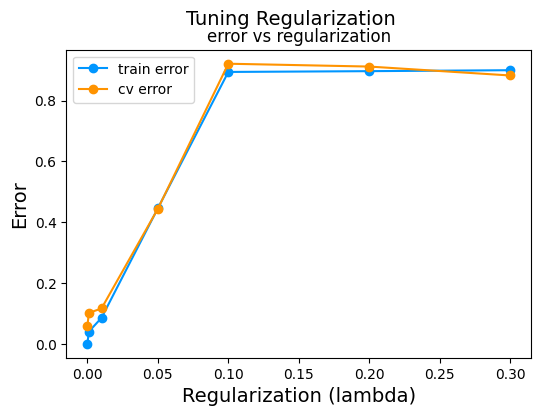

In [28]:
plot_iterate(lambdas_to_test, models, X_train, y_train, X_crossval, y_crossval)